In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, RidgeCV

In [2]:
data = pd.read_csv('fitting_N20.csv', index_col=0, header=None, names=['x', 'y'])

x = data.x.values
y = data.y.values

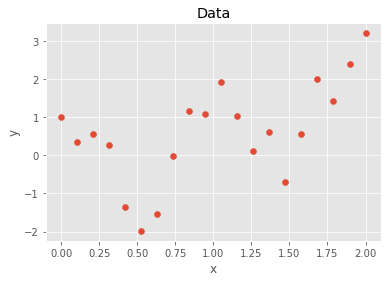

In [3]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_title('Data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(x, y)

In [4]:
D = len(x)                           # Degrees of freedom
x_test = np.linspace(0., 2., 100)
X_train = np.vander(x, D, increasing=True)
X_test = np.vander(x_test, D, increasing=True)

alphas = np.logspace(-6, 6, 1000)    # CV over these alphas
scores = []                          # Scored using MSE
cv_alphas = []
for i in range(3, D):                # For 2 <= M <= 19
    rr_gs = RidgeCV(alphas=alphas)   # Uses LOO
    rr_gs.fit(X_train[:, :i], y)
    scores.append(rr_gs.best_score_) # Collect best scores/alphas
    cv_alphas.append(rr_gs.alpha_)

best_D = np.argmax(scores) + 3       # sklearn negates MSE, so get argmax
best_alpha = cv_alphas[np.argmax(scores)]
X_train = X_train[:, :best_D]        # Truncate data
X_test = X_test[:, :best_D]
rr = Ridge(alpha=best_alpha)         # Make ridge regressor w/ best alpha
rr.fit(X_train, y)
y_pred = rr.predict(X_test)
y_train = rr.predict(X_train)

In [5]:
rr.intercept_

1.0139858937067046

In [6]:
rr.coef_

array([  0.        ,   2.02365538, -39.65221903,  46.05116764,
        33.8834062 , -26.09135853, -43.81433717,   5.67422693,
        47.31041553, -30.5450483 ,   5.55326388])

In [7]:
cv_alphas[best_D-3]

0.0001101645949633657

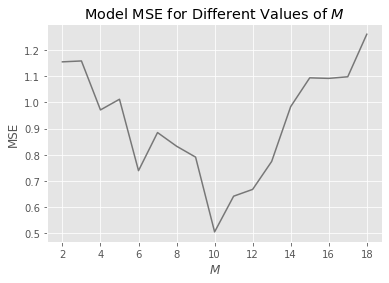

In [9]:
fig, ax = plt.subplots()
colors = list(plt.rcParams['axes.prop_cycle'])
ax.set_title('Model MSE for Different Values of $M$')
ax.set_xlabel('$M$')
ax.set_ylabel('MSE')
ax.plot(range(2, 19), [-score for score in scores], color=colors[3]['color'])

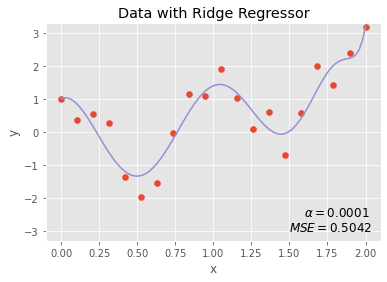

In [10]:
fig, ax = plt.subplots()
colors = list(plt.rcParams['axes.prop_cycle'])
ax.set_title('Data with Ridge Regressor')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(-3.3, 3.3)
ax.scatter(x, y)
text = '    $\\alpha={:.4f}$\n$MSE={:.4f}$'.format(
           cv_alphas[best_D-3], -scores[best_D-3])
ax.text(1.5, -3.0, text, fontsize=12)
ax.plot(x_test, y_pred, color=colors[2]['color'], label="predict mean")